# DFT transforms apt for different boundary conditions in ODE solutions

The motivation for this notebook is to survey in literature particular transforms relevant for particular boundary conditions of a given ODE (or PDE) problem. For clarity, the discussion proceeds by example, for the test problem

$$Lu = f, \quad u = u(x), f = f(x)$$

where $f$ is a given source term, $L$ is some linear operator. Here, we choose $L = d^2 / dx^2$

$$\frac{d^2u}{dx^2} = f, \qquad x\in [a,b]$$

The discrete problem is set up as


$$\underline{\underline{D}}\cdot \underline{u} = \underline{f}$$

over a grid with $N+1$ points such that $x_i = a + i\Delta x$, $\Delta x = (b - a) / N$ defines the closed interval $\cup_{i= 0}^N x_i\in [a,b]$

## A. Periodic boundary conditions

For a central differencing scheme $L_{\Delta}u = \frac{1}{(\Delta x)^2}(u_{i+1} - 2u_i + u_{i-1})$. In this periodic case there are $N$ unique grid values in the periodic case for the solution $u$, at $i = 0, 1, \ldots , N-1$, and for off-grid points we have the $N$-periodicity requirement in u $u$: $u_{i + N} = u_i$. This implies that $u_N = u_0$, and similarly $u_{-1} = u_{N-1}$, etc.

This generates the second difference (circulant) matrix

$$\underline{\underline{D}}_{N\times N} = \left( \begin{array}{c c c c c c c c c}
-2 & 1 & 0 & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & 1 \\
1 & -2 & 1 & 0 & \cdots & \cdots & \cdots & \cdots  & \cdots & 0 \\
0 & 1 & -2 & 1 & 0 & \cdots & \cdots & \cdots &  \cdots & 0 \\
0 & 0 & 1 & -2 & 1 & 0 & \cdots & \cdots & \cdots & 0\\
\vdots & \vdots & 0 & \ddots & \ddots & \ddots & 0 & \cdots & \cdots & 0\\
\vdots & \vdots & \vdots & 0 & \ddots & \ddots & \ddots & 0 & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots & 0 & \ddots & \ddots & \ddots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & 0 & 1 & -2 & 1 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & 0 & 1 & -2 & 1 \\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & -2
\end{array} \right)$$

Given that the equation This aims to solve the Poisson equation

$$Lu = f \longrightarrow L_{\Delta}u = f$$

where $L$ and $L_{\Delta}$ are the Laplacian operator and its discrete counterpart. For the continuum case, the eigenfunctions are incidentally $\sim \exp (2\pi j k x)$. Inserting this solution makes this transparent:

\begin{eqnarray*}
L u & = & \partial_x^2 \exp (2\pi j k x) \\
&& \\
& = & (j\xi)^2 \exp (2\pi jk x) \\
&&\\
L u & = & -(4\pi^2 k^2) u
\end{eqnarray*}

and reveals the eigenvalues as $\lambda_{k} = -4\pi^2 k^2$.

the above matrix is defined purely by

$$L_{\Delta} = \frac{1}{(\Delta x)^2}(u_{i+1} - 2u_i + u_{i-1})$$

the eigenvectors corresponding are similarly plane waves $u = \exp (j \xi_k x_i)$ where $j = \sqrt{-1}$, $i$ is a grid index for the gridpoints $x_i = i\Delta x = i L / N$ and the wave number $\xi_k = 2\pi k / L$ for the period $L$), in terms of only grid quantities:

$$\exp (j \xi_k x_i) = \exp (j (2\pi k / L) (i L / N)) = \exp (2\pi i j k / N)$$

Inserting this into the discrete operator:

\begin{eqnarray*}
L_{\Delta} u & = & \frac{1}{(\Delta x)^2}(u_{i+1} - 2u_i + u_{i-1}) \\
&& \\
& = & \frac{1}{(\Delta x)^2}\left(e^{2\pi (i+1) jk/N} - 2 e^{2\pi ij k/N} + e^{2\pi (i-1) jk/N}\right) \\
&& \\
& = & -\frac{1}{(\Delta x)^2}\left(e^{2\pi k/N} - 2 + e^{-2\pi k/N}\right)e^{2\pi i jk/N}\\
&& \\
& = & -\frac{1}{(\Delta x)^2}\left(2\cos (2\pi k/N) - 2\right)\underbrace{e^{2\pi i jk/N}}_{=\, u} \\
&& \\
L_{\Delta}u & = & \underbrace{\left[-\frac{1}{(\Delta x)^2}\left(2\cos (2\pi k/N) - 2\right)\right]}_{\lambda_k}u \\
L_{\Delta}u & = & \lambda_k u
\end{eqnarray*}

so the eigenvalues are

$$\lambda_k = -\frac{2}{(\Delta x)^2}\left[\cos\left(\frac{2\pi k}{N}\right) - 1\right]$$

We can assemble a matrix $\Lambda = \text{diag} (\lambda_k)_{k=0}^{N-1}$, and a matrix whose columns are the eigenvectors $\underline{e}_k = \exp (2\pi i j k / N)$, $\underline{\underline{P}} = (\underline{e}_0, \underline{e}_1, \ldots , \underline{e}_{N-1})$ and so the above can be written in the eigen form:

$$\underline{\underline{L_{\Delta}}}\cdot \underline{\underline{P}} = \underline{\underline{P}}\underline{\underline{\Lambda}}$$

or 

$$\underline{\underline{L_{\Delta}}} = \underline{\underline{P}}\cdot\underline{\underline{\Lambda}}\cdot\underline{\underline{P}}^{-1}$$

which diagonalizes the difference matrix (is a <i>spectral decomposition</i>). Note, since the eigenvectors are orthogonal, the inverse is the Hermitian adjoint ($P^{\dagger} = (P^T)^*$).



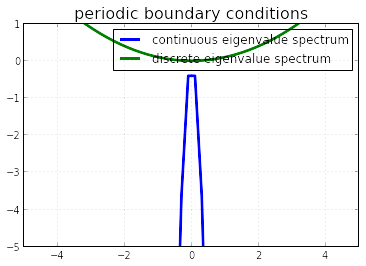

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 100
a,b = -10, 10
L = float(b - a)
dx = L / N
k = np.linspace(a,b,N)

lambda_k_cont = -4*np.pi**2*k**2
lambda_k_disc = -2 / dx ** 2 * (np.cos(2*np.pi*k / N) - 1)

plt.plot(k, lambda_k_cont, linewidth = 3, label = 'continuous eigenvalue spectrum')
plt.plot(k, lambda_k_disc, linewidth = 3, label = 'discrete eigenvalue spectrum')
plt.title('periodic boundary conditions', fontsize = 16)
plt.legend(loc = 'best')
plt.axis([-5,5,-5,1])
plt.grid()